# Marketing Campaign

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV


### Reading Excel File and Exploratory Data Analysis

In [203]:
df = pd.read_excel("marketing_campaign.xlsx")

In [204]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [195]:
df.head(6)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,5,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,4,1,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0


In [205]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [206]:
#there were 28 null values in Income column and I have deleted those rows because I couldn't find a way to impute those values as Income is totally independent of any other columns
pd.isnull(df).sum()
df = df.drop(labels=df[df['Income'].isnull()].index.tolist(), axis=0)
#pd.isnull(df).sum()

In [207]:
#imputing the numrics to catorical data under Education column
df['Education'].replace(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'],
                        [1, 2, 3, 4, 5], inplace=True)

In [208]:
#imputing the numrics to catorical data under Marital_Status column
df['Marital_Status'].replace(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO'], 
                        [2, 0, 3, 1, 0, 1, 4, 6], inplace=True)

In [209]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,5,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3,1,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,5,1,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,3,3,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,4,1,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### Logistic Regression

In [11]:
X = df.drop(['Response', 'Dt_Customer', 'ID'], axis=1)
y = df['Response']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

In [13]:
logR=LogisticRegression(max_iter=1000)

In [14]:
logR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
predictions = logR.predict(X_test)

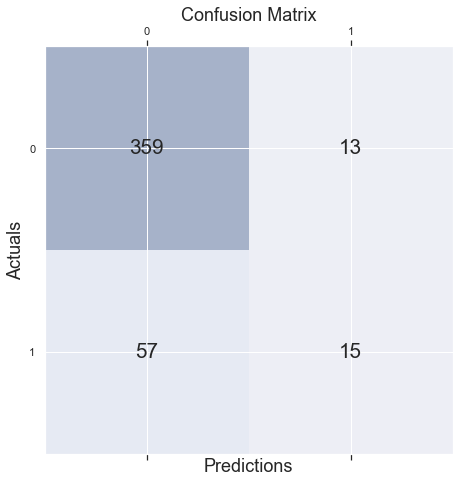

In [16]:
conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [196]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       372
           1       0.54      0.21      0.30        72

    accuracy                           0.84       444
   macro avg       0.70      0.59      0.61       444
weighted avg       0.81      0.84      0.81       444



### Feature importance by Logistic Regression

Text(0.5, 0, 'Importance')

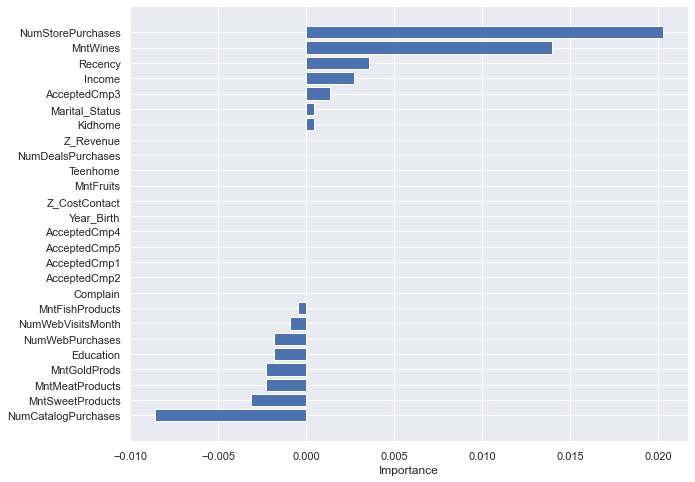

In [153]:
perm_importance = permutation_importance(logR, X_test, y_test)

feature_names = X.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Importance")

### SVM

In [114]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [115]:
#this shows that the model is not predicting the 1's. So I used random sampler to 
PredictionSVM = model.predict(X_test)
print(confusion_matrix(y_test, PredictionSVM))

[[372   0]
 [ 72   0]]


In [116]:
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [169]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X, y, test_size=0.30)

In [183]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_ros, y_train_ros)
# Check the number of records after over sampling
print("Number of records After Over Sampling")
print(sorted(Counter(y_train_ros).items()))

Number of records After Over Sampling
[(0, 1511), (1, 1511)]


In [184]:
model.fit(X_train_ros, y_train_ros)
PredictionSVM = model.predict(X_test)
print(confusion_matrix(y_test, PredictionSVM))

[[304  68]
 [ 42  30]]


In [185]:
print(classification_report(y_test, PredictionSVM))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       372
           1       0.31      0.42      0.35        72

    accuracy                           0.75       444
   macro avg       0.59      0.62      0.60       444
weighted avg       0.79      0.75      0.77       444



In [186]:
#as the accuracy was still poor, so to improve it I have changed some parameters using Grid search and ofund the important parameters and estimators
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1, 0.01, 0.001, 0.0001]}

In [202]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [188]:
grid.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.911 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.772 total time=   0.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.762 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.690 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.911 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.772 total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.762 total time=   0.2s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.690 total time=   0.3s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.911 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.997 total time=   0.1s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.997 total time=   0.1s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.995 total time=   0.1s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.995 total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.987 total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.995 total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.995 total time=   0.1s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.987 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.997 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.997 total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [189]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [190]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [191]:
grid_predictions = grid.predict(X_test_ros)

[[557   6]
 [ 17  85]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       563
           1       0.93      0.83      0.88       102

    accuracy                           0.97       665
   macro avg       0.95      0.91      0.93       665
weighted avg       0.96      0.97      0.96       665



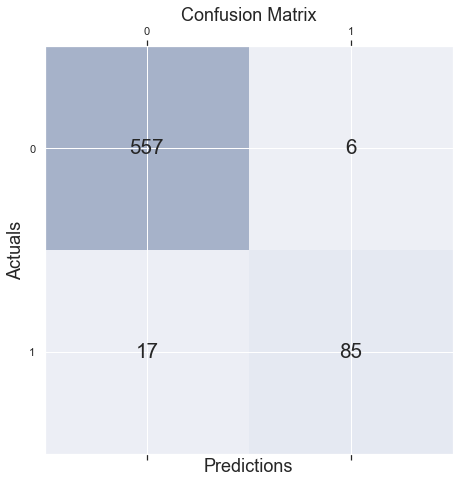

In [210]:
print(confusion_matrix(y_test_ros,grid_predictions))
print('\n')
print(classification_report(y_test_ros, grid_predictions))

confuse_matrix = confusion_matrix(y_test_ros, grid_predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confuse_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confuse_matrix.shape[0]):
    for j in range(confuse_matrix.shape[1]):
        ax.text(x=j, y=i,s=confuse_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Feature importance by SVM

Text(0.5, 0, 'Permutation Importance')

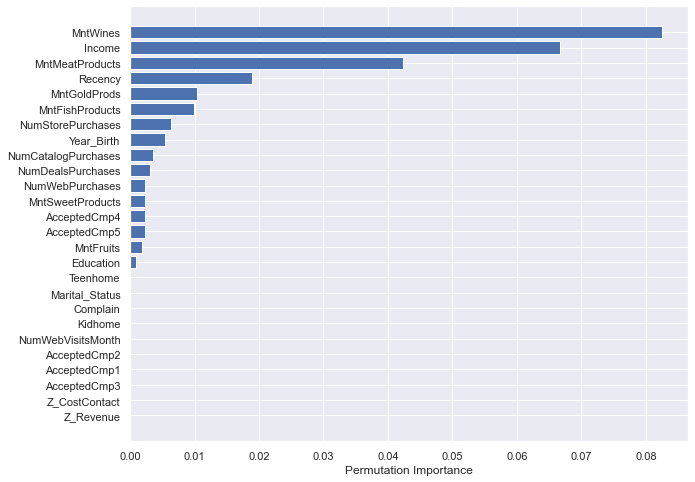

In [194]:
svc =  SVC(kernel='linear', C=1, gamma=1)
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

feature_names = X.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")